# Start to investigate and view the data so we can perform some EDA on it

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_csv('Z:/Documents/proj data/train.csv')

dft=pd.read_csv('Z:/Documents/proj data/val.csv')

In [3]:
df.shape

(1000000, 11)

In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,2016-06-08 07:53:39,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,2016-04-03 13:11:58,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,2016-06-05 02:59:27,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2016-05-05 17:32:54,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,2016-05-12 19:06:25,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [5]:
df.drop(columns='id', axis=1, inplace=True)
df.drop(columns="dropoff_datetime", axis=1,inplace=True)
df.info()
dft.drop(columns='id', axis=1, inplace=True)
dft.drop(columns="dropoff_datetime", axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1000000 non-null  int64  
 1   pickup_datetime     1000000 non-null  object 
 2   passenger_count     1000000 non-null  int64  
 3   pickup_longitude    1000000 non-null  float64
 4   pickup_latitude     1000000 non-null  float64
 5   dropoff_longitude   1000000 non-null  float64
 6   dropoff_latitude    1000000 non-null  float64
 7   store_and_fwd_flag  1000000 non-null  object 
 8   trip_duration       1000000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 68.7+ MB


In [6]:
# So we got no nulls

df.isnull().sum()#no nulls 

vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06
mean,1.534793,1.665353,-73.973475,40.750947,-73.973421,40.751829,9.548850e+02
std,0.498788,1.315723,0.065404,0.033745,0.065432,0.035782,3.882070e+03
min,1.000000,0.000000,-121.933342,34.359695,-121.933304,34.359695,1.000000e+00
25%,1.000000,1.000000,-73.991852,40.737372,-73.991341,40.735928,3.970000e+02
50%,2.000000,1.000000,-73.981728,40.754131,-73.979767,40.754551,6.620000e+02
75%,2.000000,2.000000,-73.967346,40.768379,-73.963036,40.769833,1.074000e+03
max,2.000000,7.000000,-61.335529,51.881084,-61.335529,43.921028,2.227612e+06


- we have some outliers that we can drop

In [8]:
df = df.loc[df['trip_duration']<20000]
df.shape

(998577, 9)

### We can add a new column that represent the distance coverd by in each trip using haversine_distance that given 2 points with their lon. and lat. , it return the distance between them in kilometers .

In [9]:
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    d_lat = lat2 - lat1
    d_lon = lon2 - lon1
    a = math.sin(d_lat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(d_lon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    earth_radius_km = 6371  # Earth's radius in kilometers
    distance = earth_radius_km * c

    return distance

In [10]:

dft['distance'] = dft.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
df['distance'] = df.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

 ### start to view columns types

In [11]:
df_flot = df.select_dtypes(include=['float64']) 
df_int = df.select_dtypes(include=['int64'])  
df_flot.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance
count,998577.000000,998577.000000,998577.000000,998577.000000,998577.000000
mean,-73.973477,40.750950,-73.973426,40.751830,3.437721
std,0.065414,0.033736,0.065455,0.035776,4.419725
min,-121.933342,34.359695,-121.933304,34.359695,0.000000
25%,-73.991852,40.737373,-73.991341,40.735931,1.231950
50%,-73.981728,40.754131,-73.979767,40.754551,2.090796
75%,-73.967354,40.768383,-73.963036,40.769836,3.870220
max,-61.335529,51.881084,-61.335529,43.921028,1240.908677


- we can log the distance

### deal with date column

In [12]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['month'] = df['pickup_datetime'].dt.month
df['week'] = df['pickup_datetime'].dt.weekday
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['weekday'] = df['pickup_datetime'].dt.day_name()
df['time_of_day'] = pd.cut(df['hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

dft['pickup_datetime'] = pd.to_datetime(dft['pickup_datetime'])
dft['month'] = dft['pickup_datetime'].dt.month
dft['week'] = dft['pickup_datetime'].dt.weekday
dft['day'] = dft['pickup_datetime'].dt.day
dft['hour'] = dft['pickup_datetime'].dt.hour
dft['weekday'] = dft['pickup_datetime'].dt.day_name()
dft['time_of_day'] = pd.cut(dft['hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

In [13]:
df.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,month,week,day,hour,weekday,time_of_day
0,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040,2.763050,6,2,8,7,Wednesday,Morning
1,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827,1.959178,4,6,3,12,Sunday,Morning
2,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614,1.404772,6,6,5,2,Sunday,Night
3,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867,1.978660,5,3,5,17,Thursday,Afternoon
4,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967,20.837745,5,3,12,17,Thursday,Afternoon


## we can do some visulizations to check any patterns

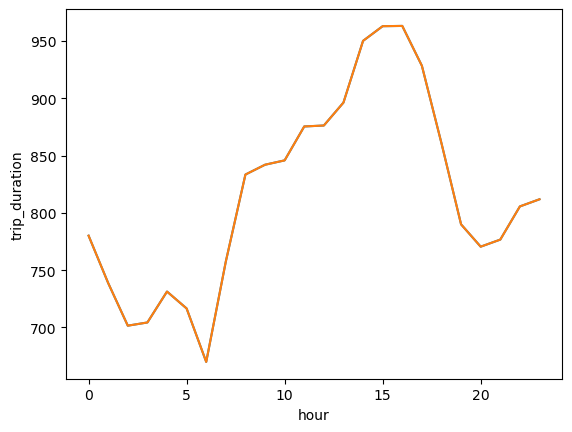

In [14]:
Grouped_by_WS =df.groupby("hour")["trip_duration"].mean()
plt.plot(Grouped_by_WS.index , Grouped_by_WS.values)
Grouped_by_WS.plot()
plt.xlabel("hour")
plt.ylabel("trip_duration")
plt.show()
# we can see that around hour 15 , the trips with the longest trip_duration take place

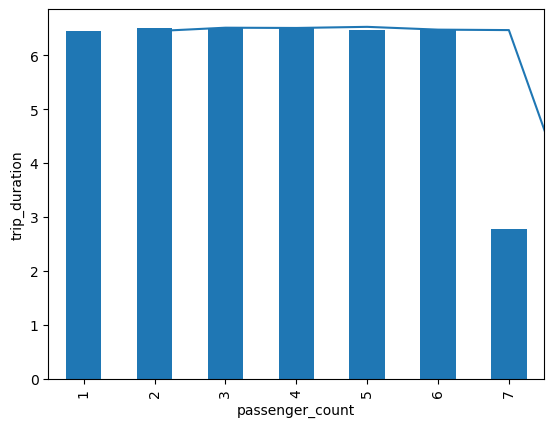

In [35]:
Grouped_by_WS =df.groupby("passenger_count")["trip_duration"].mean()
plt.plot(Grouped_by_WS.index , Grouped_by_WS.values)
Grouped_by_WS.plot(kind='bar')
plt.xlabel("passenger_count")
plt.ylabel("trip_duration")
plt.show()

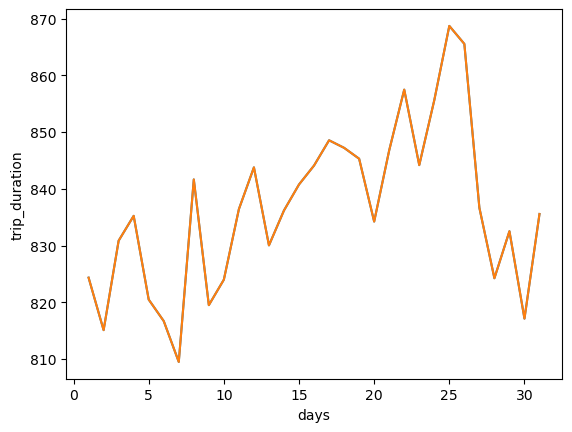

In [15]:
Grouped_by_WS =df.groupby("day")["trip_duration"].mean()
plt.plot(Grouped_by_WS.index , Grouped_by_WS.values)
Grouped_by_WS.plot()
plt.xlabel("days")
plt.ylabel("trip_duration")
plt.show()
# we can see that at some days  , mean trip_duration is high compared to others

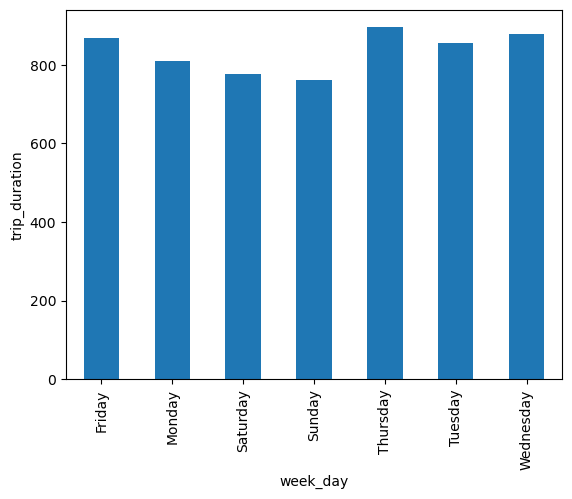

In [16]:
Grouped_by_WS =df.groupby("weekday")["trip_duration"].mean()
Grouped_by_WS.plot(kind='bar')
plt.xlabel("week_day")
plt.ylabel("trip_duration")
plt.show()

In [17]:
df['trip_duration'] = np.log1p(df['trip_duration'])
dft['trip_duration'] = np.log1p(dft['trip_duration'])
# Apply np.log1p() to the target variable 'trip_duration'

- Also by taking log of the distance seems to work well 

## add more feautures

In [18]:

# Add additional distance features
df['euclidean_distance'] = ((df['pickup_longitude'] - df['dropoff_longitude'])**2 +
                            (df['pickup_latitude'] - df['dropoff_latitude'])**2)**0.5
df['manhattan_distance'] = abs(df['pickup_longitude'] - df['dropoff_longitude']) + \
                            abs(df['pickup_latitude'] - df['dropoff_latitude'])
                            
dft['euclidean_distance'] = ((dft['pickup_longitude'] - dft['dropoff_longitude'])**2 +
                            (dft['pickup_latitude'] - dft['dropoff_latitude'])**2)**0.5
dft['manhattan_distance'] = abs(dft['pickup_longitude'] - dft['dropoff_longitude']) + \
                            abs(dft['pickup_latitude'] - dft['dropoff_latitude'])




In [19]:
df['distance'] = np.log1p(df['distance'])
dft['distance'] = np.log1p(dft['distance'])
df['euclidean_distance'] = np.log1p(df['euclidean_distance'])
dft['euclidean_distance'] = np.log1p(dft['euclidean_distance'])
df['manhattan_distance'] = np.log1p(df['manhattan_distance'])
dft['manhattan_distance'] = np.log1p(dft['manhattan_distance'])

- one hot encoding to categorical feautures

In [20]:
# One-Hot Encoding
df = pd.get_dummies(df,columns=['vendor_id','store_and_fwd_flag','weekday','time_of_day'])

# One-Hot Encoding
dft = pd.get_dummies(dft,columns=['vendor_id','store_and_fwd_flag','weekday','time_of_day'])



In [21]:
df = df.loc[df['passenger_count']>0]
df = df.loc[df['distance']>0]

In [22]:
df.columns

Index(['pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'trip_duration', 'distance', 'month', 'week', 'day', 'hour',
       'euclidean_distance', 'manhattan_distance', 'vendor_id_1',
       'vendor_id_2', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'time_of_day_Night', 'time_of_day_Morning',
       'time_of_day_Afternoon', 'time_of_day_Evening'],
      dtype='object')

In [42]:
df.head()

,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,month,week,...,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,time_of_day_Night,time_of_day_Morning,time_of_day_Afternoon,time_of_day_Evening,speed,speedd,speeddd
0,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,6.947937,1.325230,6,2,...,0,0,1,0,1,0,0,2.329870,0.843819,10.601837
1,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,6.719013,1.084912,4,6,...,0,0,0,0,1,0,0,2.640409,0.734726,3.254735
2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,6.421622,0.877455,6,6,...,0,0,0,1,0,0,0,1.013385,1.684040,4.387275
3,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,6.766192,1.091473,5,3,...,1,0,0,0,0,1,0,2.973233,1.157807,5.457367
4,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,8.510773,3.083640,5,3,...,1,0,0,0,0,1,0,3.978220,2.590359,37.003679


In [30]:
df['speed']=df['distance']*df['hour']
dft['speed']=dft['distance']*dft['hour']

In [31]:
df['speed'] = np.log1p(df['speed'])
dft['speed'] = np.log1p(dft['speed'])

In [ ]:
df['speedd']=df['distance']*df['passenger_count']
dft['speedd']=dft['distance']*dft['passenger_count']

In [43]:


# Split the data into features (X) and target variable (y)
X = df.drop(columns=['trip_duration','pickup_datetime'])
y = df['trip_duration']

# Split the data into training and testing sets (80% train, 20% test)
X_test = dft.drop(columns=['trip_duration','pickup_datetime'])
y_test= dft['trip_duration']




# Train the Ridge regression model
ridge_model = Ridge(alpha=1)  # You can adjust the regularization parameter (alpha) as needed
ridge_model.fit(X, y)

# Make predictions on the testing data
y_pred = ridge_model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.23941034306566017
R-squared: 0.6259427383241397
